In [8]:
from alphalens_bugfix.alphalens.utils import get_clean_factor_and_forward_returns
from alphalens_bugfix.alphalens.tears import create_returns_tear_sheet
from alphalens_bugfix.alphalens.tears import create_summary_tear_sheet
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

ftr_list = []
for path in os.listdir('data\\day_frequence_data'):
    ftr = pd.read_feather(os.path.join('data\\day_frequence_data', path))
    ftr_list.append(ftr)

result = pd.concat(ftr_list)
df_ohclv = result.reset_index(drop=True)
df_ohclv = df_ohclv[['time', 'code', 'close']]
df_ohclv = df_ohclv.set_index(['time', 'code']).unstack()['close']
print(type(df_ohclv))

ftr_list = []
for path in os.listdir('data\\factor_mainforce'):
    ftr = pd.read_feather(os.path.join('data\\factor_mainforce', path))
    date = pd.Timestamp((path.split('_')[1].split('.')[0]))
    date_list = [date for i in range(ftr.shape[0])]
    ftr.insert(loc=0, column='date', value=date_list)
    ftr_list.append(ftr)

result = pd.concat(ftr_list)
df = result.reset_index(drop=True)
dfg = df.groupby(['date', 'code']).mean()
# dfg = df.set_index(['time', 'code'])
print(type(dfg))
std = dfg['STD']
skew = dfg['SKEW']
kurt = dfg['KURT']
mts = dfg['MTS']
mte = dfg['MTE']
sr = dfg['SR']
qua = dfg['QUA']
print(type(qua))

alpha_qua = get_clean_factor_and_forward_returns(qua, df_ohclv, quantiles=10)
alpha_std = get_clean_factor_and_forward_returns(std, df_ohclv, quantiles=10)
alpha_skew = get_clean_factor_and_forward_returns(skew, df_ohclv, quantiles=10)
alpha_kurt = get_clean_factor_and_forward_returns(kurt, df_ohclv, quantiles=10)
alpha_mts = get_clean_factor_and_forward_returns(mts, df_ohclv, quantiles=10)
alpha_mte = get_clean_factor_and_forward_returns(mte, df_ohclv, quantiles=10)
alpha_sr = get_clean_factor_and_forward_returns(sr, df_ohclv, quantiles=10)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase

evaluating qua ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

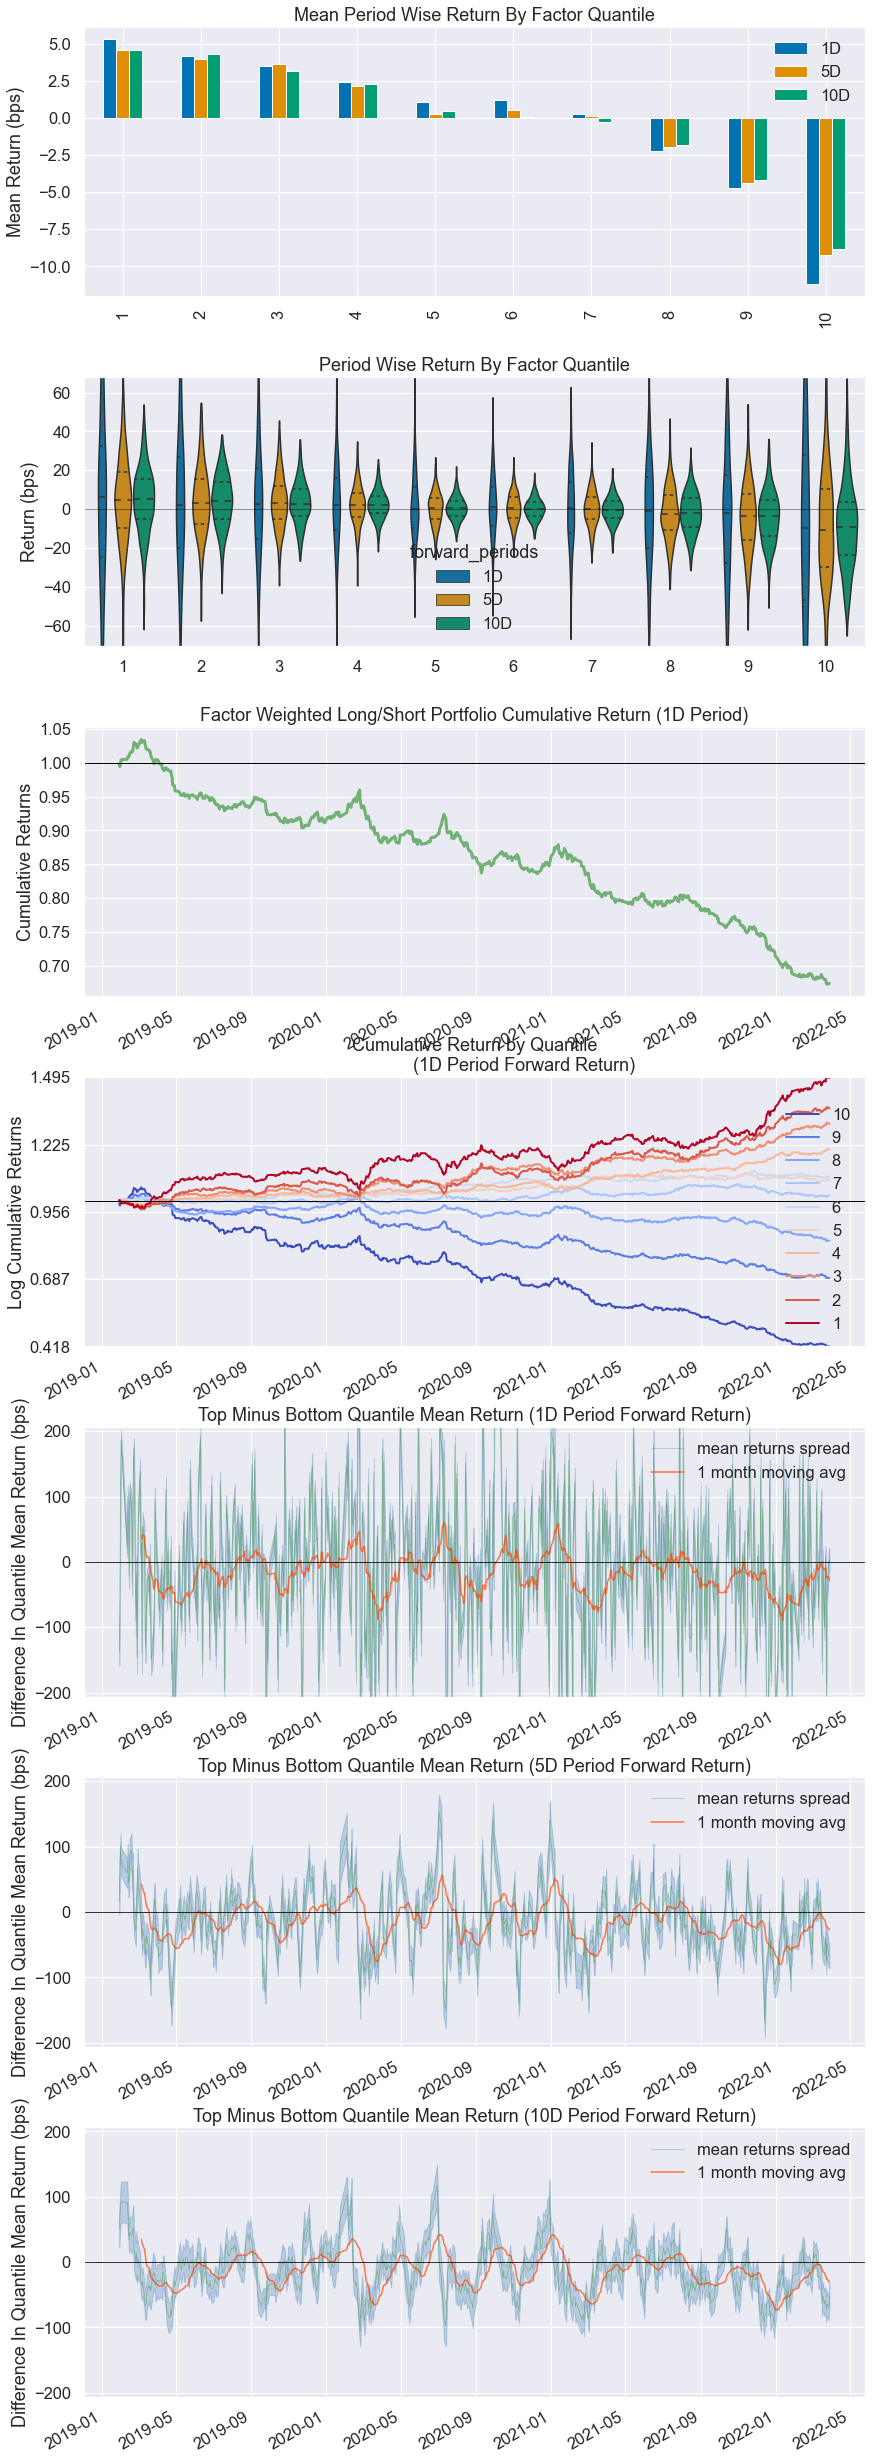

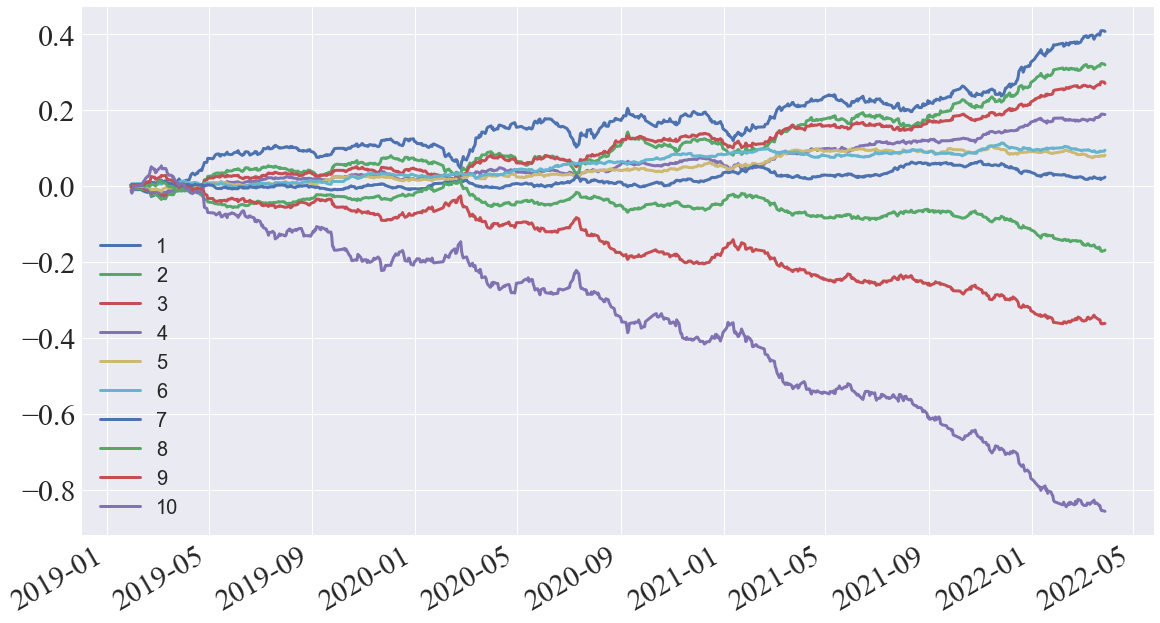

evaluating std ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

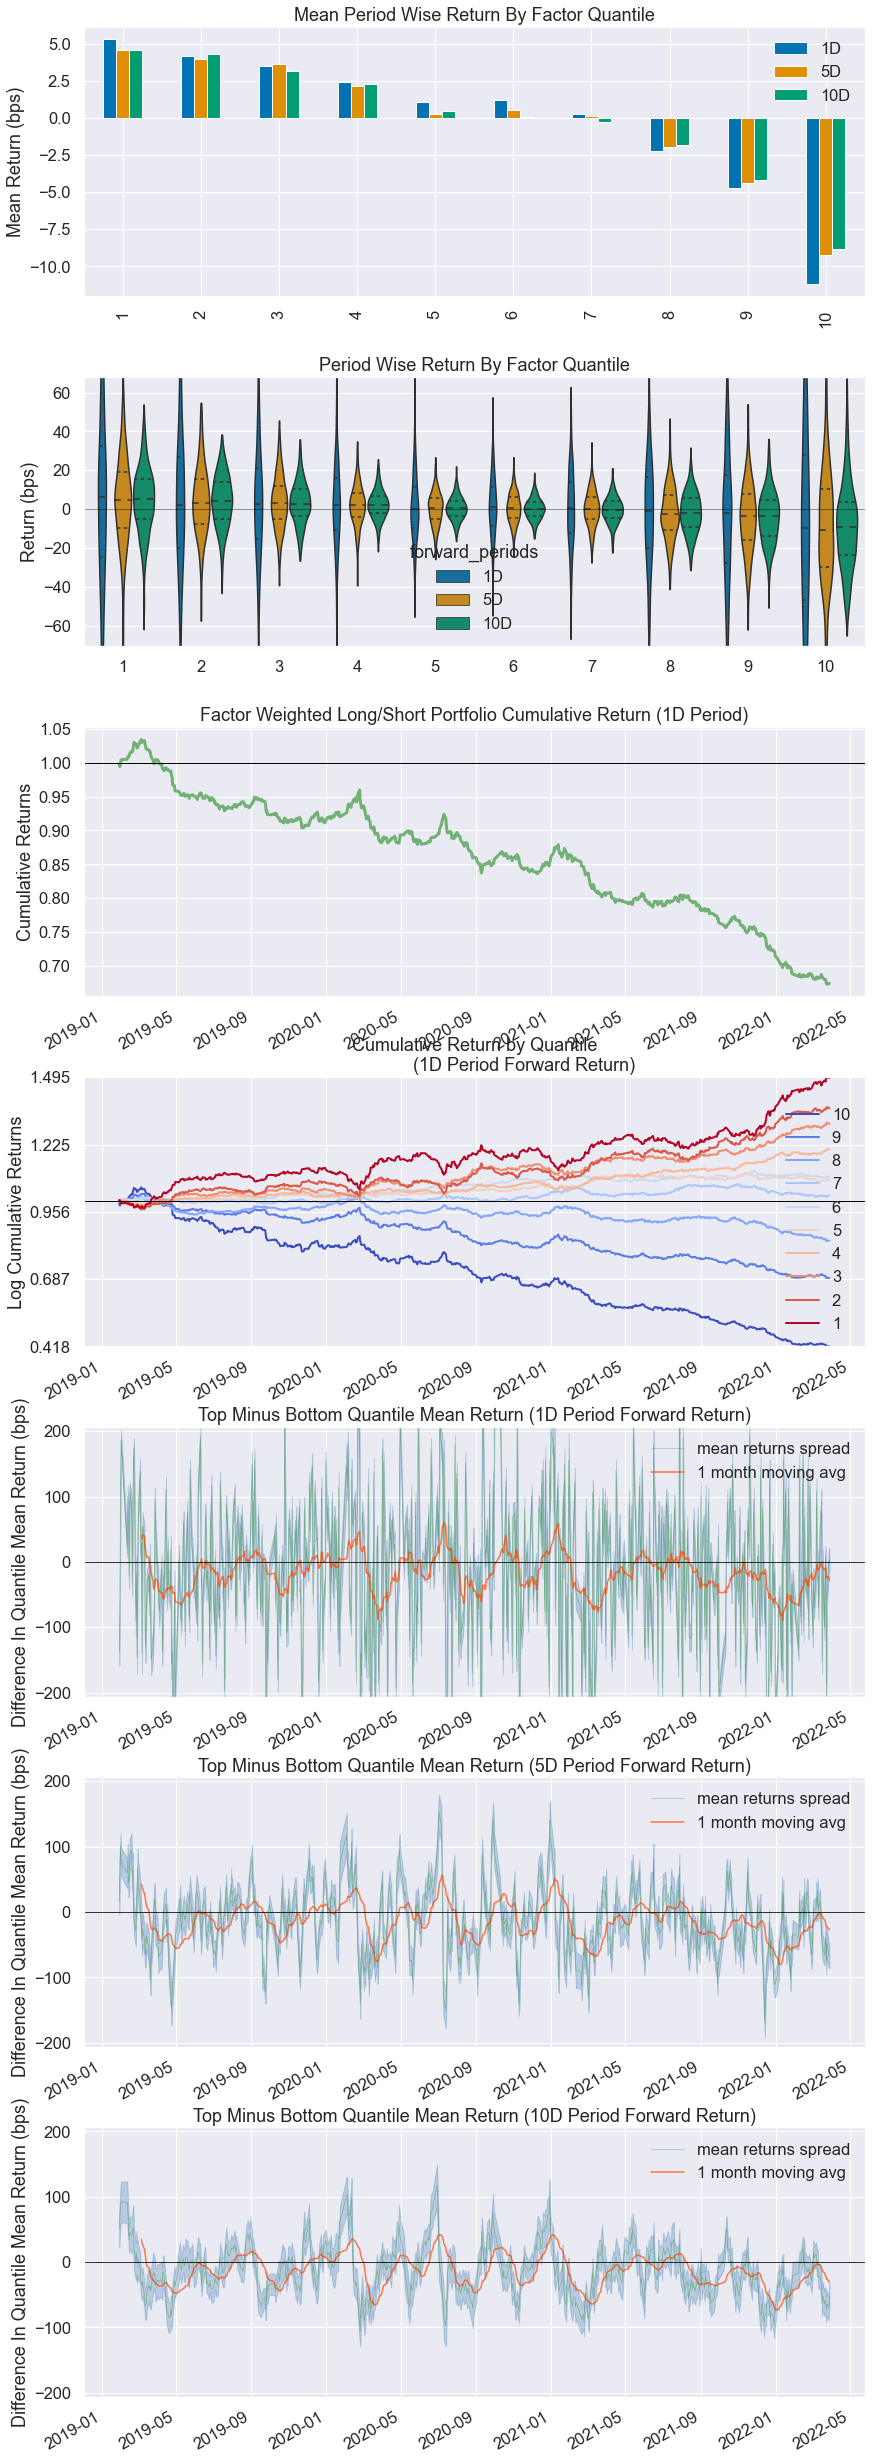

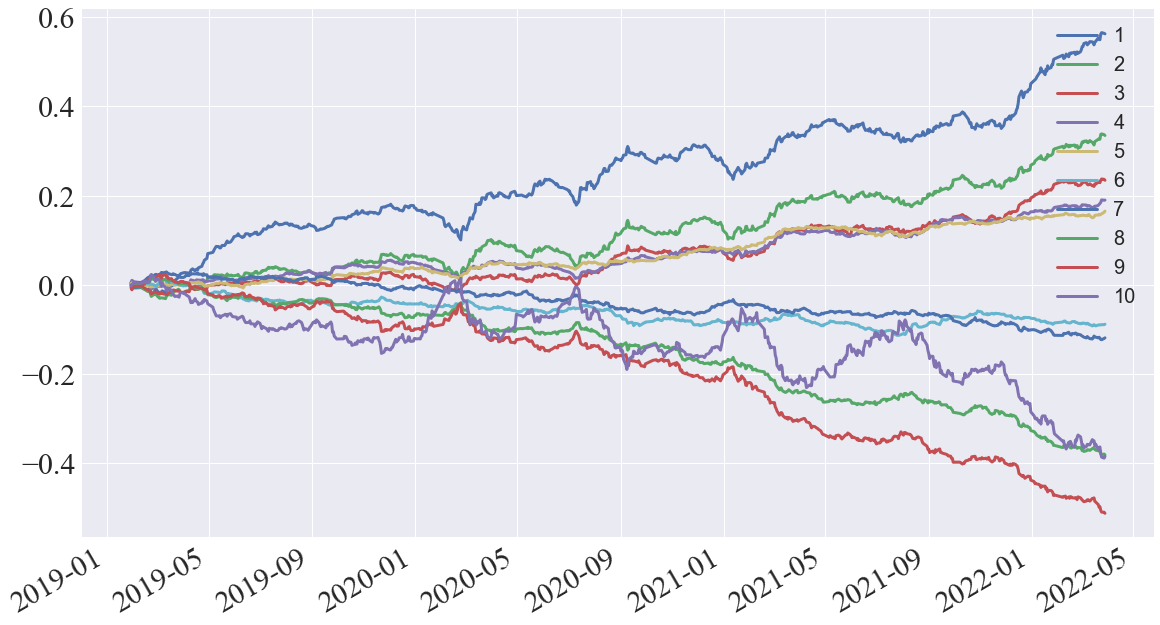

evaluating skew ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

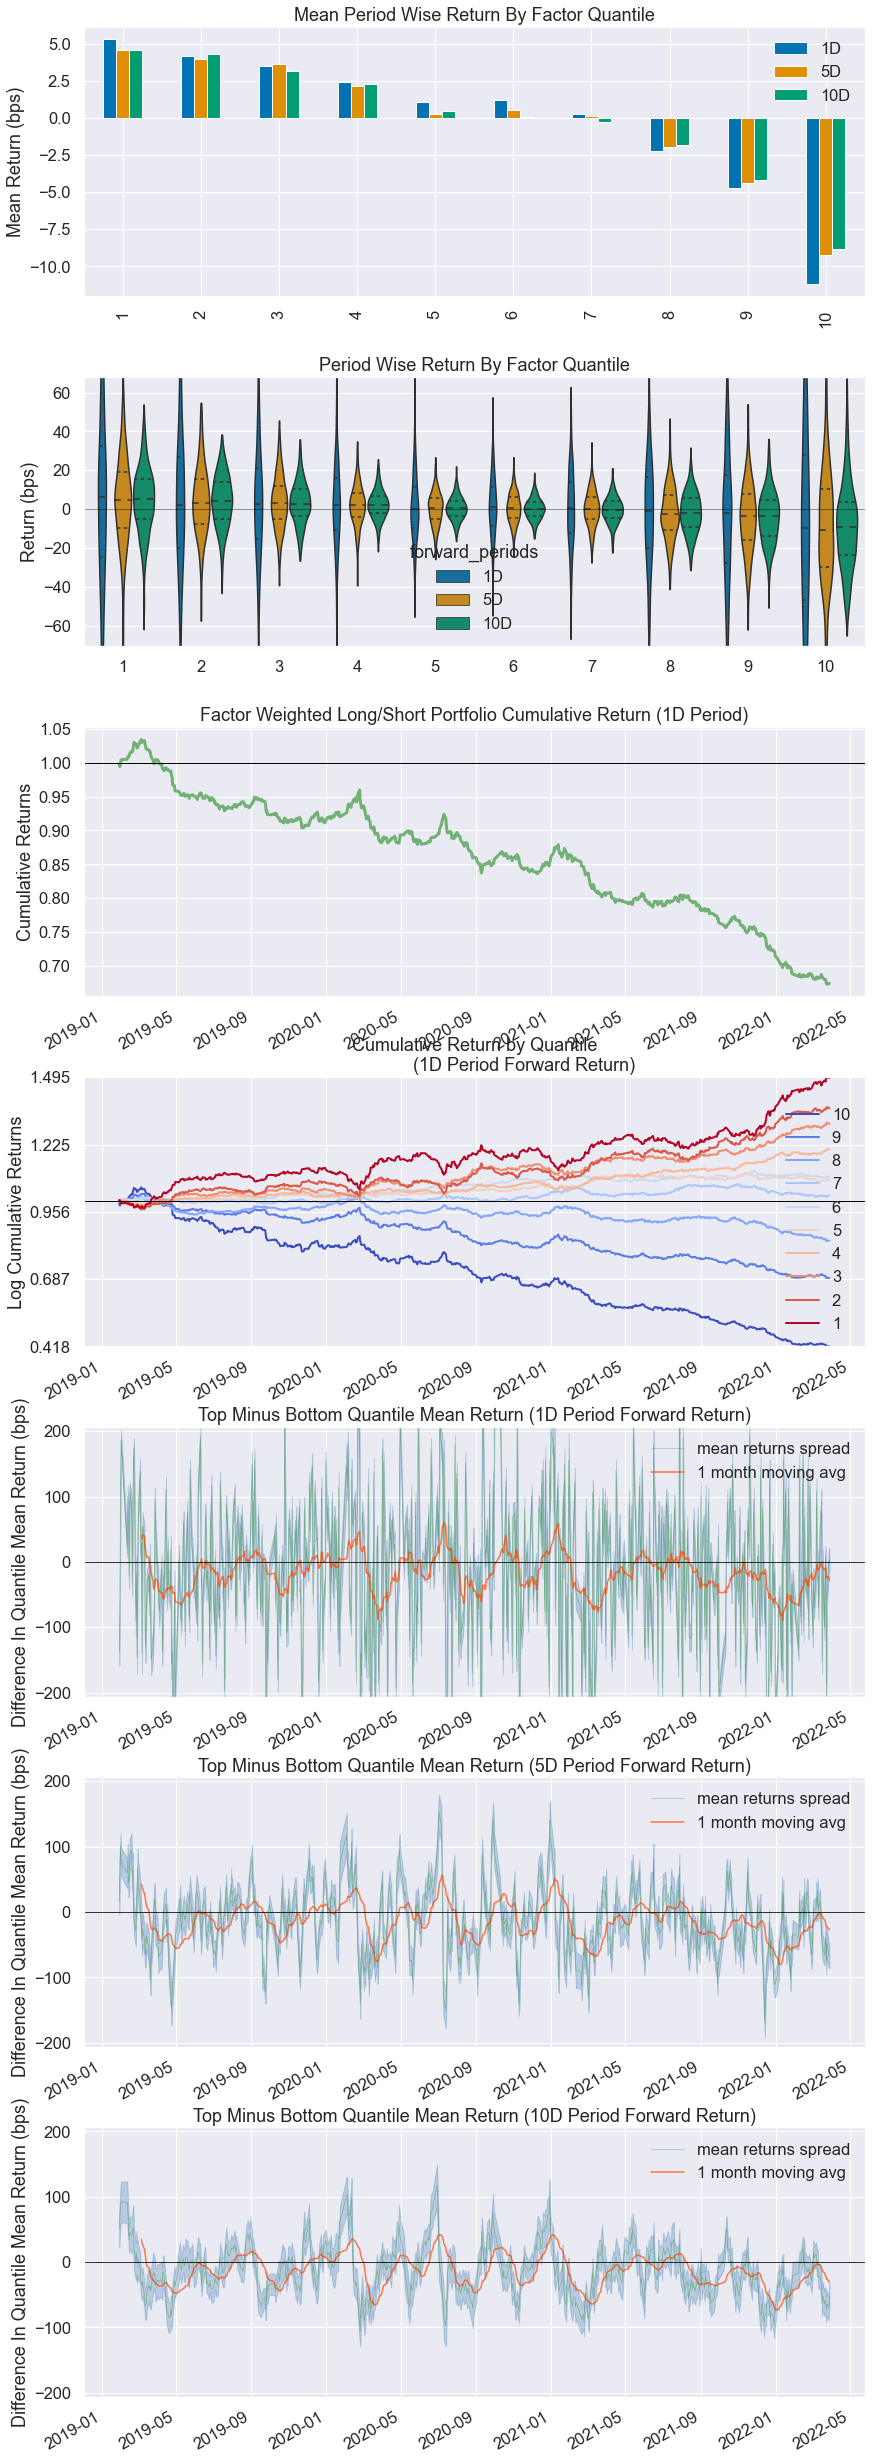

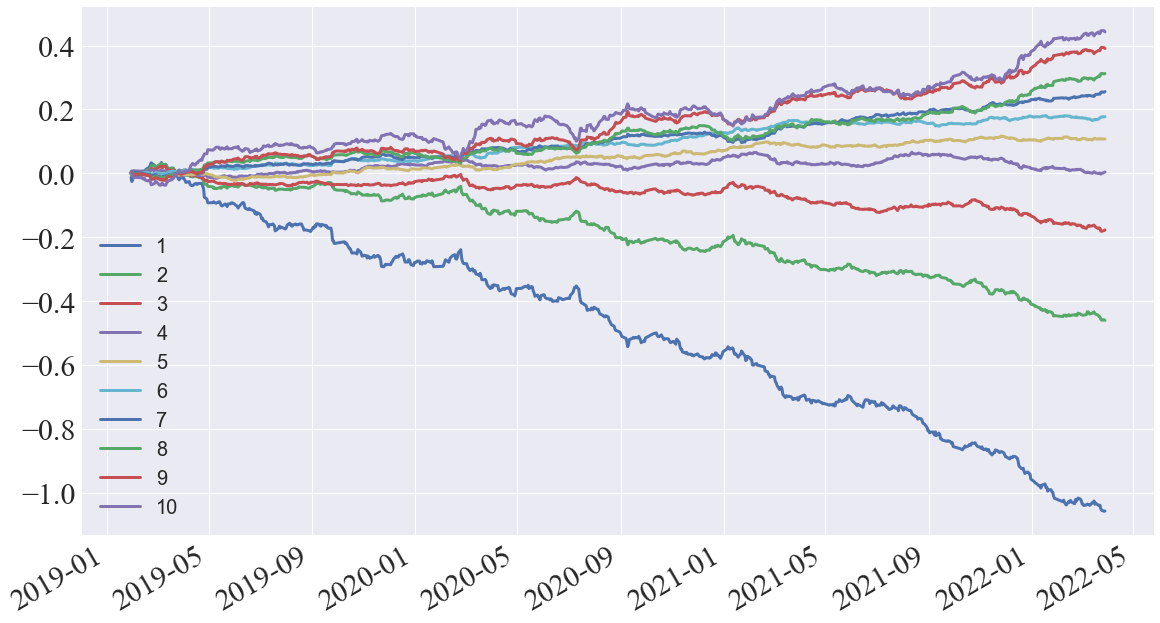

evaluating kurt ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

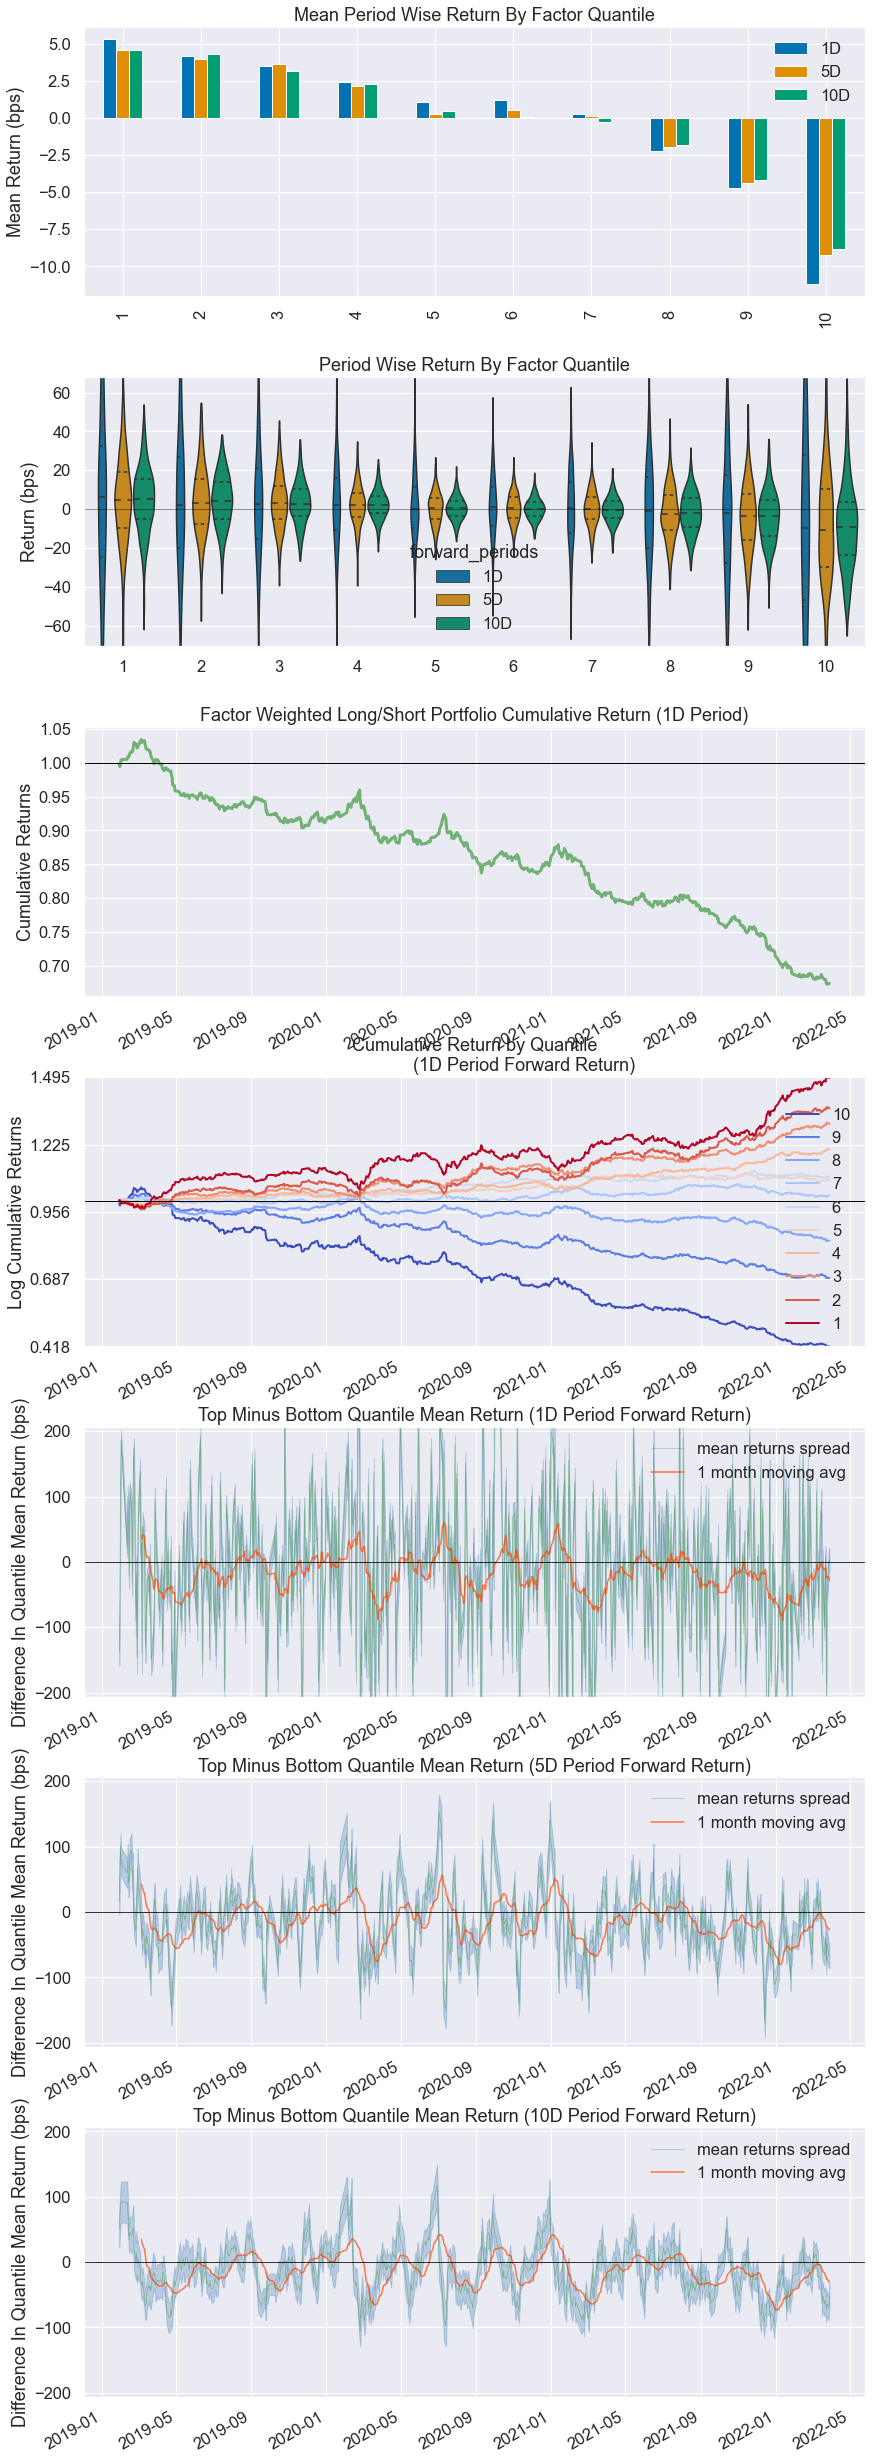

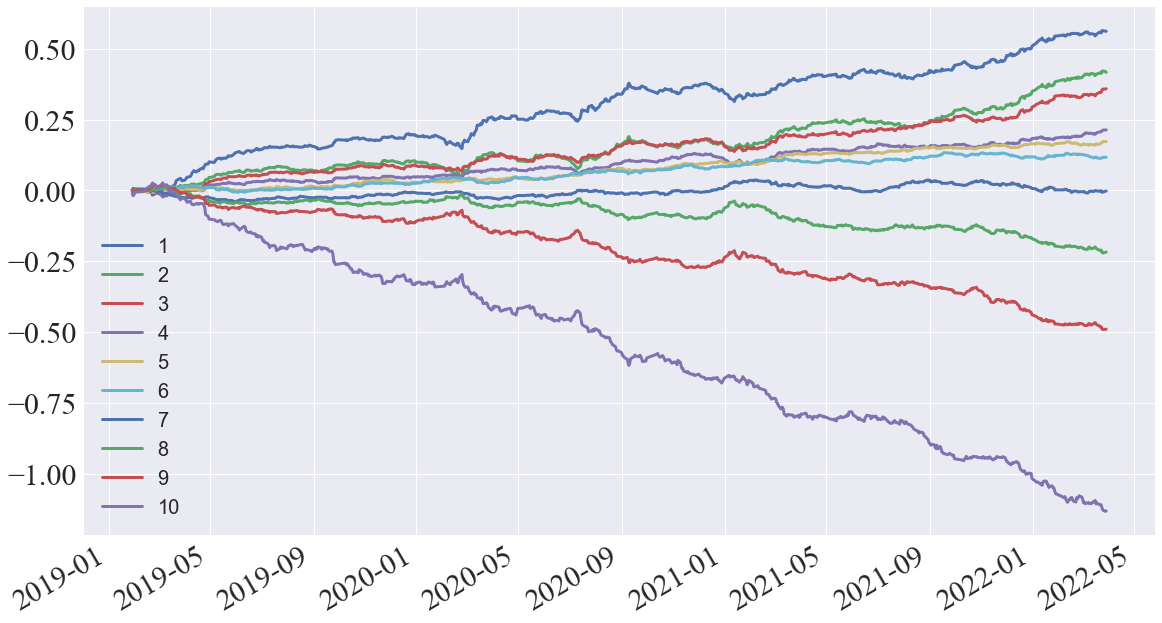

evaluating mts ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

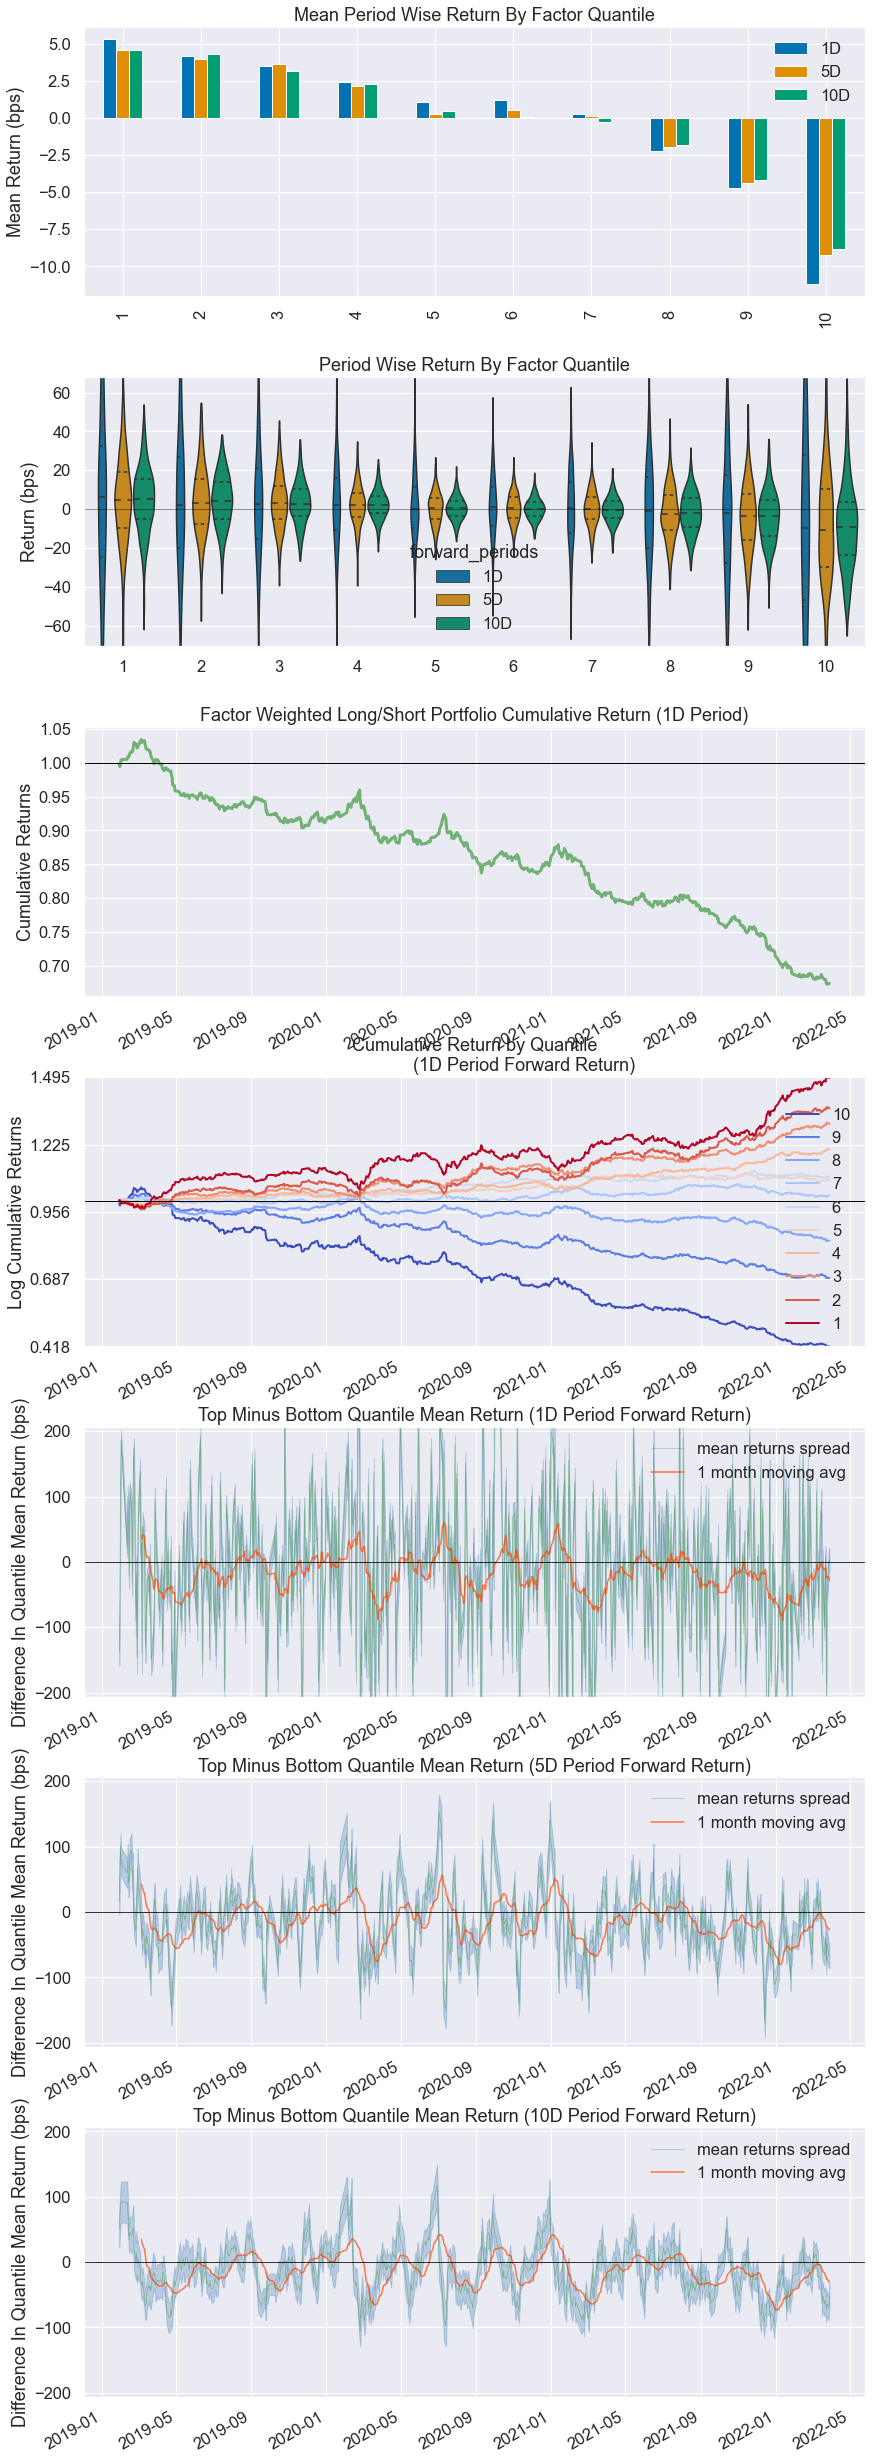

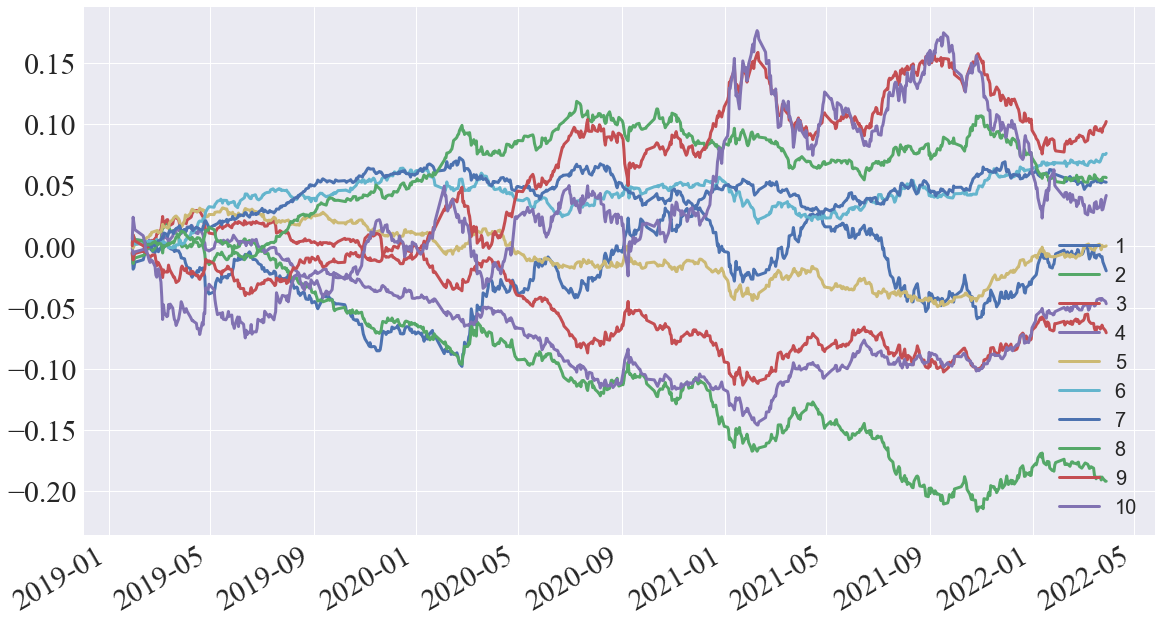

evaluating mte ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

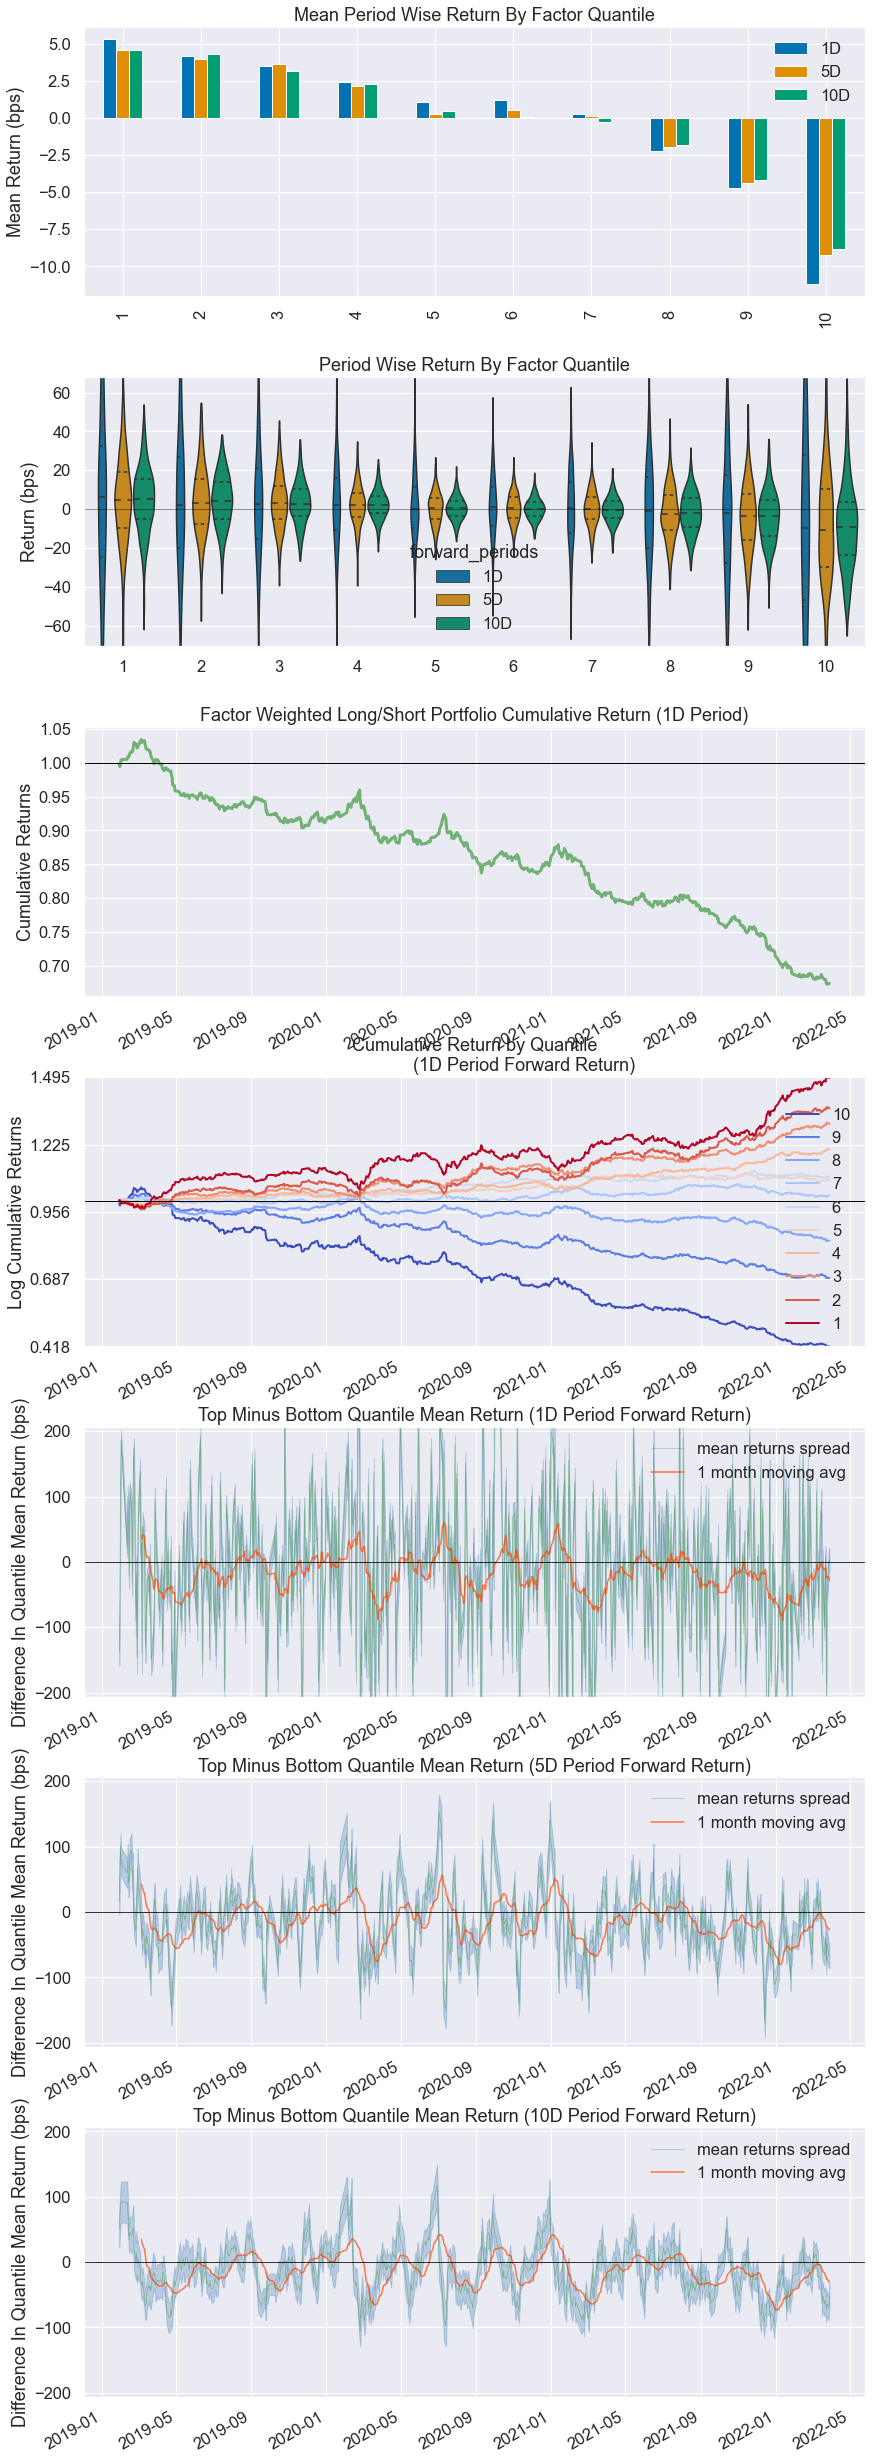

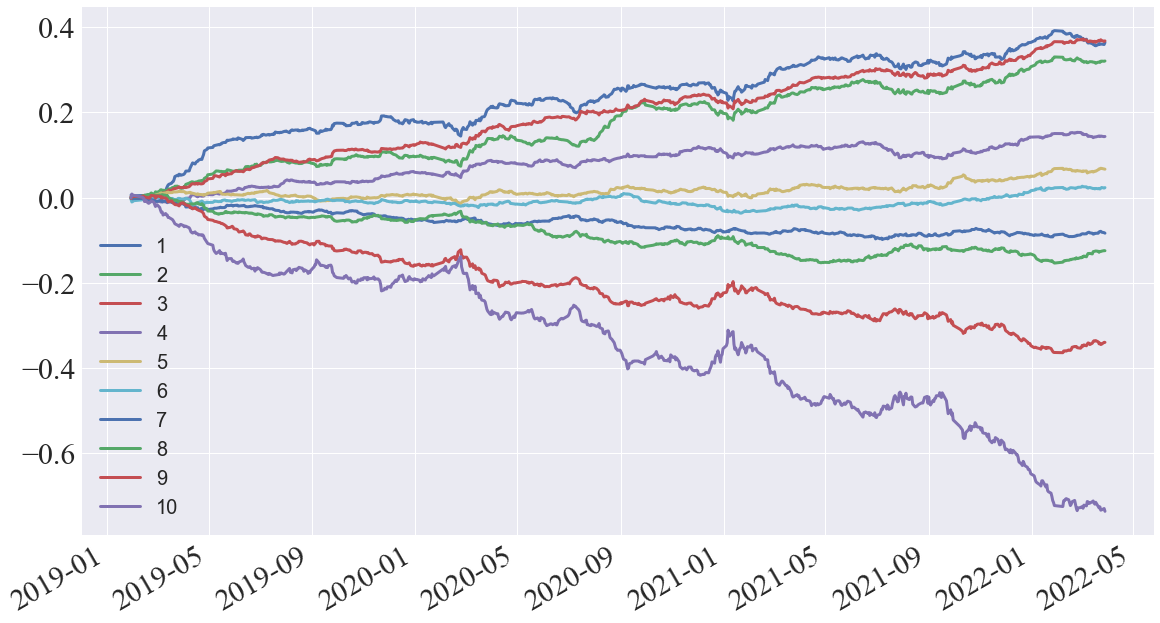

evaluating sr ...
Returns Analysis


1D      5D     10D
Ann. alpha                                     -0.142  -0.127  -0.123
beta                                            0.135   0.123   0.115
Mean Period Wise Return Top Quantile (bps)    -11.195  -9.261  -8.853
Mean Period Wise Return Bottom Quantile (bps)   5.328   4.629   4.595
Mean Period Wise Spread (bps)                 -16.523 -13.962 -13.531

<Figure size 1382.4x777.6 with 0 Axes>

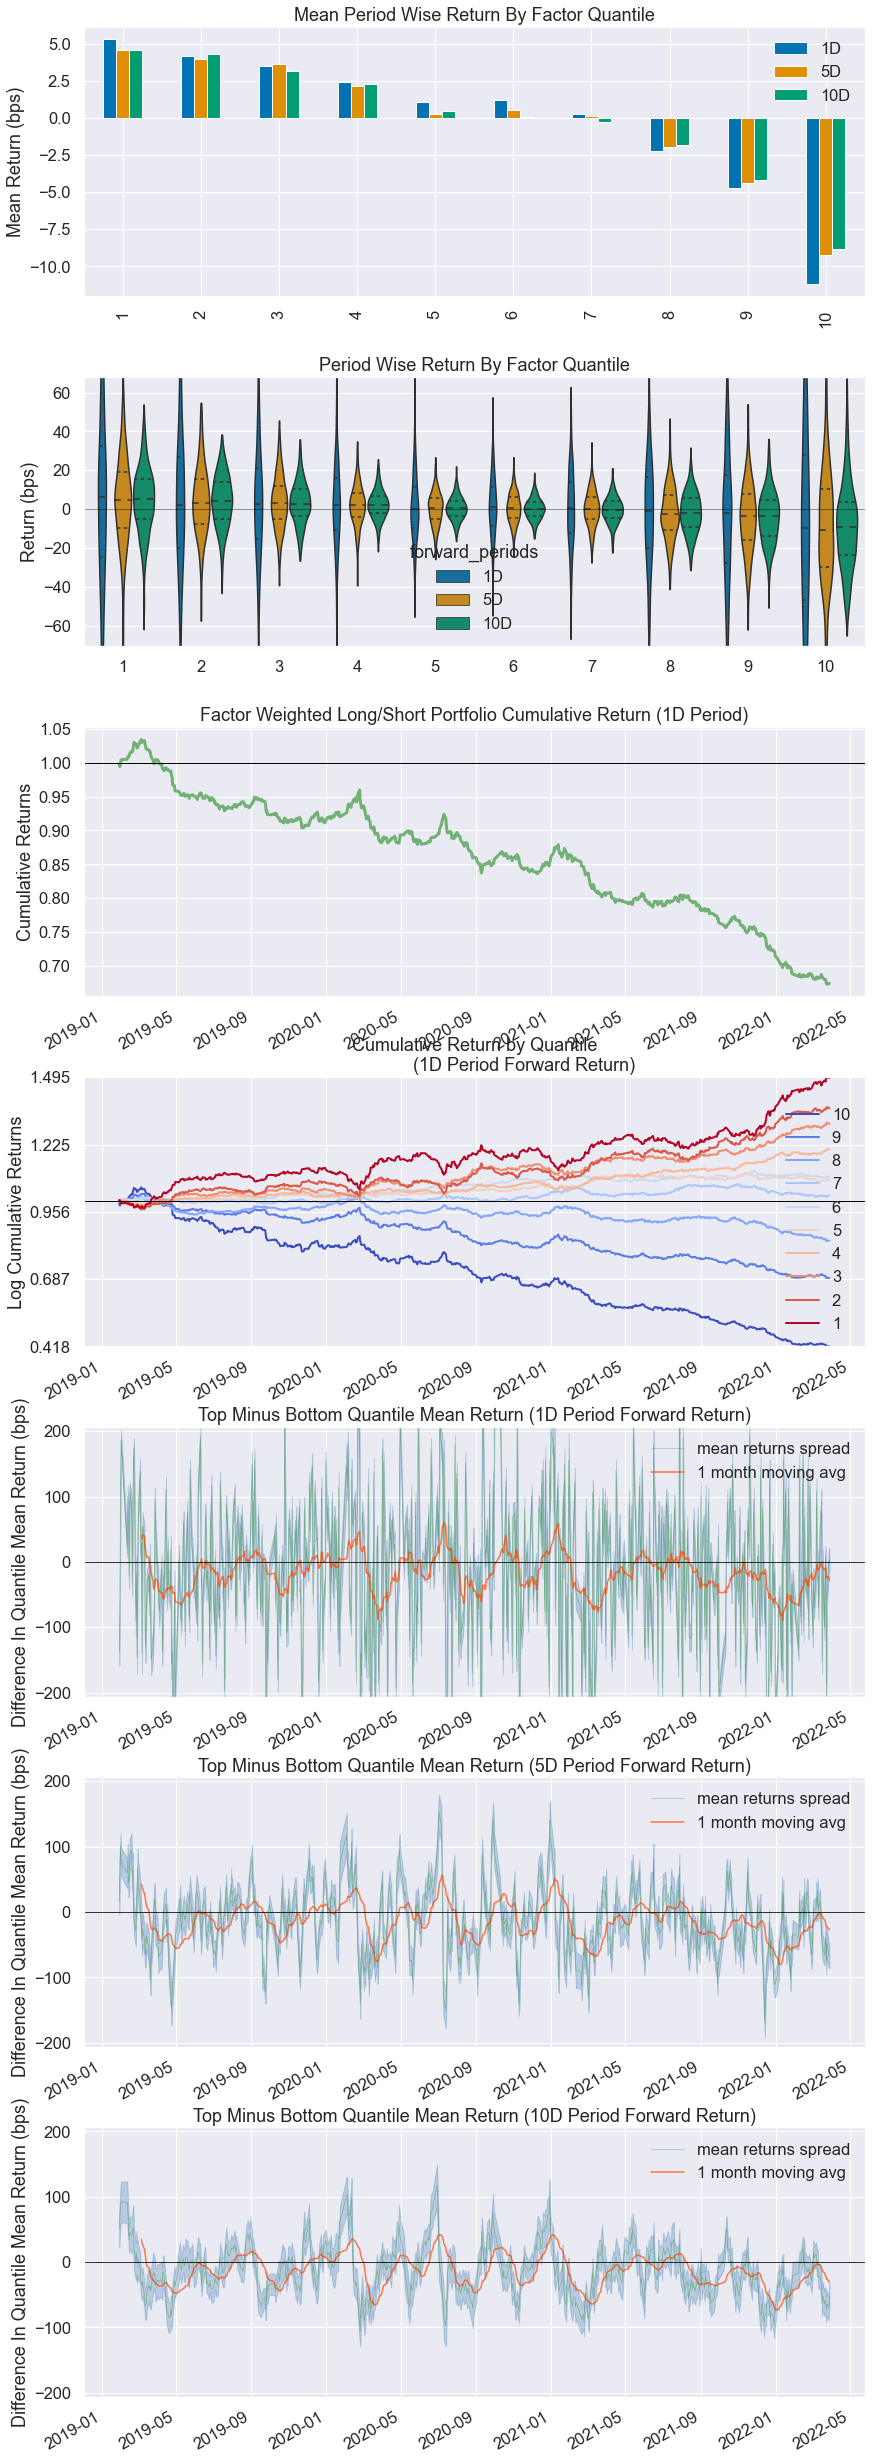

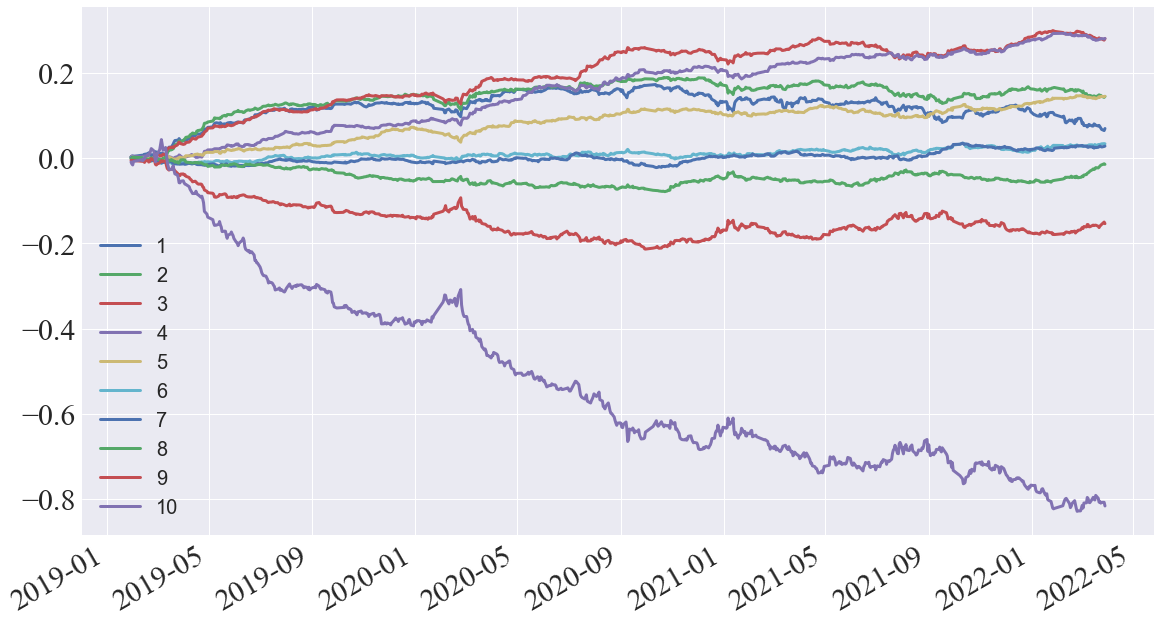

In [12]:
alpha_list = [alpha_qua, alpha_std, alpha_skew, alpha_kurt, alpha_mts, alpha_mte, alpha_sr]
alpha_name = ['qua', 'std', 'skew', 'kurt', 'mts', 'mte', 'sr']

# os.makedirs('evaluation/cumlative_return')

idx = 0
for i in range(len(alpha_list)):
    print(f'evaluating {alpha_name[i]} ...')
    alpha = alpha_list[i]
    create_returns_tear_sheet(alpha_qua)
    quantiles = 10
    from alphalens_bugfix import alphalens
    mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(
        alpha,
        by_date=True,
        demeaned=True
    )
    mean_return_by_q = mean_return_by_q.reset_index()
    mean_return_by_q = mean_return_by_q.set_index('factor_quantile')
    factor_quantile_list = []
    for i in range(quantiles):  # factor_quantile: 1 ~ n
        df = mean_return_by_q.loc[i + 1]
        df = df.reset_index()
        df = df.drop(['factor_quantile'], axis=1)
        factor_quantile_list.append(df)

    fq_list = factor_quantile_list
    extract_cumulative_list = []
    i = 0
    for fq in fq_list:
        i += 1
        fq = fq[['date', '1D']].copy()
        for j in range(1, factor_quantile_list[0].shape[0]):
            fq.iloc[j, 1] = fq.iloc[j - 1, 1] + fq.iloc[j, 1]
        fq = fq.set_index('date')
        fq.rename(columns={'1D': str(i)}, inplace=True)
        extract_cumulative_list.append(fq)
    # extract_list
    plot_df = pd.concat(extract_cumulative_list, axis=1)

    # plt.rcParams['font.sans-serif']=['SimHei']
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize']=(19.2, 10.8)
    fig = plot_df.plot(kind='line', linewidth=3)
    fig.axes.title.set_size(40)
    plt.legend(loc='best',fontsize=20)
    plt.xticks(fontproperties='Times New Roman', size=30)
    plt.yticks(fontproperties='Times New Roman', size=30)
    plt.xlabel('')
    plt.savefig(f'evaluation/cumlative_return/{alpha_name[idx]}_cumlative_return_by_quantile({quantiles}).png')
    plt.show()
    idx += 1